In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
from collections import Counter
from matplotlib.pyplot import figure
sns.set(style='whitegrid')

In [3]:
## df cleaned is saved from subreddit_classification notebook's 
## df_cleaned data before modeling
df_cleaned = pd.read_csv('df_cleaned_latest.csv')

In [4]:
## as subreddit_classification showed there is 100K obs
df_cleaned.shape

(100000, 7)

In [171]:
df_cleaned.head(2)

,Unnamed: 0,comment,label,comment_tokens,comment_tokens_cleaned,comment_tokens_cleaned_final,comment_cleaned_count_final
0,0,"What the fuck?\n\nTell me, how is shoving a kn...",0,"['what', 'the', 'fuck?', '', 'tell', 'me,', 'h...","['what', 'the', 'fuck', 'tell', 'me', 'how', '...","['fuck', 'tell', 'shoving', 'knife', 'stomach'...",66
1,1,Ancient astronauts must have taught these peop...,0,"['ancient', 'astronauts', 'must', 'have', 'tau...","['ancient', 'astronauts', 'must', 'have', 'tau...","['ancient', 'astronauts', 'must', 'taught', 'p...",11


In [ ]:
## data has two labels
## 0 stands for tree subreddits
## 1 stands for gaming subreddits
## 0 and 1 is kept throughout the notebook to keep labeling short

In [5]:
## here i show count of all words in comments for each group
## df has column that show umber of tokens for each clened comment
## it seems group 1 which is gaming subreddit has more words in comments
df_cleaned.groupby('label').sum()['comment_cleaned_count_final']

label
0    496250
1    640810
Name: comment_cleaned_count_final, dtype: int64

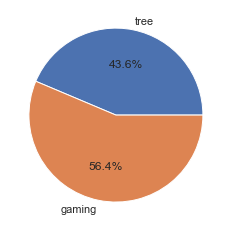

In [6]:
plt.pie(df_cleaned.groupby('label').sum()['comment_cleaned_count_final'], 
        labels=['tree','gaming'], autopct='%1.1f%%',)
plt.show()

In [7]:
## here i separate comments for each labels and keep them as lists
df_cleaned_0 = df_cleaned.loc[df_cleaned.label == 0] ##tree
df_cleaned_1 = df_cleaned.loc[df_cleaned.label == 1] ##gaming

all_tokens_cleaned = []
all_tokens_cleaned_0 = []
all_tokens_cleaned_1 = []

for a in df_cleaned.index:
    all_tokens_cleaned.extend(eval(df_cleaned.comment_tokens_cleaned_final[a]))

for a in df_cleaned_0.index:
    all_tokens_cleaned_0.extend(eval(df_cleaned_0.comment_tokens_cleaned_final[a]))

for a in df_cleaned_1.index:
    all_tokens_cleaned_1.extend(eval(df_cleaned_1.comment_tokens_cleaned_final[a]))

In [176]:
print('All tokens in data: ' + str(len(all_tokens_cleaned)))
print('All unique tokens in data: ' + str(len(set(all_tokens_cleaned))))
print('-------------------------------')
print('All tokens in tree data: ' + str(len(all_tokens_cleaned_0)))
print('All unique tokens in tree data: ' + str(len(set(all_tokens_cleaned_0))))
print('-------------------------------')
print('All tokens in gaming data: ' + str(len(all_tokens_cleaned_1)))
print('All unique tokens in gaming data: ' + str(len(set(all_tokens_cleaned_1))))
print('-------------------------------')
print('Unique tokens over all tokens in tree data: ' + str(len(set(all_tokens_cleaned_0)) / len(all_tokens_cleaned_0)))
print('Unique tokens over all tokens in gaming data: ' + str(len(set(all_tokens_cleaned_1)) / len(all_tokens_cleaned_1)))


All tokens in data: 1137060
All unique tokens in data: 57424
-------------------------------
All tokens in tree data: 496250
All unique tokens in tree data: 35117
-------------------------------
All tokens in gaming data: 640810
All unique tokens in gaming data: 39406
-------------------------------
Unique tokens over all tokens in tree data: 0.0707647355163728
Unique tokens over all tokens in gaming data: 0.06149404659727532


In [175]:
## it seems comments in tree subgroup has smaller vocabulary than gaming
## however, the ratio of unique tokens over all tokens show that tree subreddit has richer vocabulary

In [25]:
## here i look at count of words for each cases
all_tokens_counted_1 = Counter(all_tokens_cleaned_1)
all_tokens_counted_0 = Counter(all_tokens_cleaned_0)

tokens_counted_0 = pd.DataFrame.from_dict(all_tokens_counted_0, orient='index').reset_index()
tokens_counted_1 = pd.DataFrame.from_dict(all_tokens_counted_1, orient='index').reset_index()

tokens_counted_0['label'] = ['0'] * len(all_tokens_counted_0)
tokens_counted_1['label'] = ['1'] * len(all_tokens_counted_1)

tokens_counted_merged = pd.merge(tokens_counted_1, tokens_counted_0, left_on='index', right_on='index', how='outer')
tokens_counted_merged.rename(columns={'index':'words', '0_x':'count_1', 'label_x':'label_1',
                                      '0_y':'count_0', 'label_y':'label_0'}, inplace=True)

In [177]:
tokens_counted_merged.head(2)

,words,count_1,label_1,count_0,label_0
0,tony,14.0,1,4.0,0
1,hawk,12.0,1,8.0,0


In [112]:
tokens_counted_only_0 = tokens_counted_merged.loc[(tokens_counted_merged['label_1'] != '1') & (tokens_counted_merged['label_0'] == '0')]
tokens_counted_only_1 = tokens_counted_merged.loc[(tokens_counted_merged['label_1'] == '1') & (tokens_counted_merged['label_0'] != '0')]
tokens_counted_both = tokens_counted_merged.loc[(tokens_counted_merged['label_1'] == '1') & (tokens_counted_merged['label_0'] == '0')]

In [159]:
## it seems words that appear in both subreddits have higher correlation in terms of counts
## they are mostly used common words
np.corrcoef(tokens_counted_both.count_1,tokens_counted_both.count_0)

array([[1.        , 0.81224298],
       [0.81224298, 1.        ]])

In [ ]:
tokens_counted_both['count_both'] = tokens_counted_both['count_0'] + tokens_counted_both['count_1'] 
tokens_counted_both['count_0_share'] = tokens_counted_both['count_0'] / tokens_counted_both['count_both'] 
tokens_counted_both['count_1_share'] = tokens_counted_both['count_1'] / tokens_counted_both['count_both'] 

In [178]:
tokens_counted_both.head(2)

,words,count_1,label_1,count_0,label_0,count_both,count_0_share,count_1_share
0,tony,14.0,1,4.0,0,18.0,0.222222,0.777778
1,hawk,12.0,1,8.0,0,20.0,0.400000,0.600000


In [167]:
## tokens that appear in gaming subreddit only
tokens_counted_only_1.count_1.describe()

count    22307.000000
mean         2.290223
std          6.490484
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max        261.000000
Name: count_1, dtype: float64

In [165]:
## tokens that appear in tree subreddit only
## token count description
tokens_counted_only_0.count_0.describe()

count    18018.000000
mean         1.881285
std          8.261117
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max        605.000000
Name: count_0, dtype: float64

In [163]:
## tokens that appear in both subreddits
## token count desc gaming subreddits
tokens_counted_both.count_1.describe()

count    17099.000000
mean        34.488684
std        172.965263
min          1.000000
25%          2.000000
50%          5.000000
75%         16.000000
max       9090.000000
Name: count_1, dtype: float64

In [161]:
## tokens that appear in both subreddits
## token count desc tree subreddits
tokens_counted_both.count_0.describe()

count    17099.000000
mean        27.039768
std        136.464772
min          1.000000
25%          1.000000
50%          4.000000
75%         12.000000
max       6178.000000
Name: count_0, dtype: float64

In [168]:
## tokens that appear in both subreddits
tokens_counted_both.count_both.describe()

count    17099.000000
mean        61.528452
std        294.759969
min          2.000000
25%          4.000000
50%          9.000000
75%         29.000000
max      12759.000000
Name: count_both, dtype: float64

In [151]:
tokens_counted_both.sort_values(['count_both'])

,words,count_1,label_1,count_0,label_0,count_both,count_0_share,count_1_share
33700,sfu,1.0,1,1.0,0,2.0,0.500000,0.500000
32767,vandalized,1.0,1,1.0,0,2.0,0.500000,0.500000
19188,katrina,1.0,1,1.0,0,2.0,0.500000,0.500000
14092,pming,1.0,1,1.0,0,2.0,0.500000,0.500000
32774,mindboggling,1.0,1,1.0,0,2.0,0.500000,0.500000
...,...,...,...,...,...,...,...,...
81,dont,4282.0,1,3826.0,0,8108.0,0.471880,0.528120
4,one,4778.0,1,3743.0,0,8521.0,0.439268,0.560732
384,im,3968.0,1,4731.0,0,8699.0,0.543856,0.456144
14,game,9090.0,1,243.0,0,9333.0,0.026037,0.973963


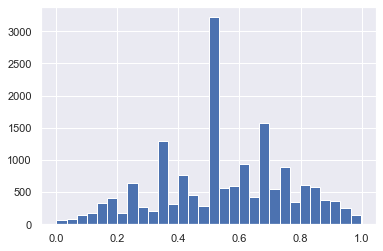

In [155]:
tokens_counted_both.count_1_share.hist(bins = 30)

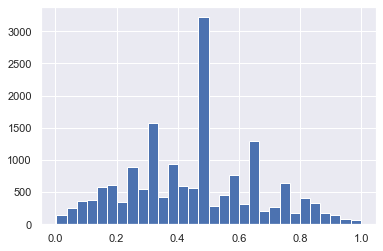

In [154]:
tokens_counted_both.count_0_share.hist(bins = 30)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 <a list of 20 Text xticklabel objects>)

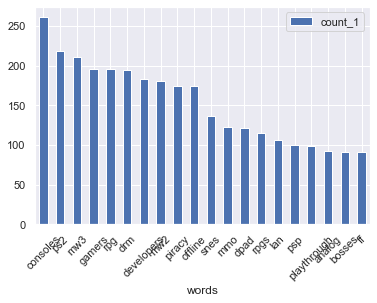

In [111]:
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')

tokens_counted_only_1.sort_values('count_1', ascending=False)[:20].plot.bar('words','count_1')
plt.xticks(rotation=45)

## here consoles and ps2 are top words that appear only in gaming comments

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 <a list of 20 Text xticklabel objects>)

<Figure size 640x480 with 0 Axes>

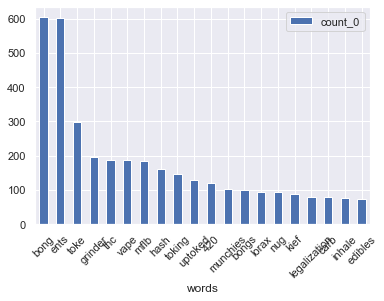

In [110]:
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')

tokens_counted_only_0.sort_values('count_0', ascending=False)[:20].plot.bar('words','count_0')
plt.xticks(rotation=45)

## here bong and ents are common words that appeared only in tree subreddit comments

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 <a list of 20 Text xticklabel objects>)

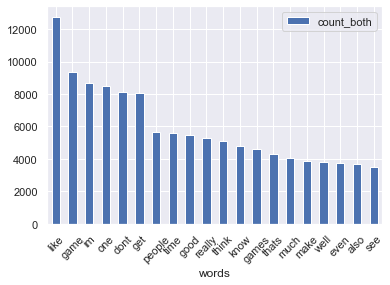

In [118]:
tokens_counted_both.sort_values('count_both', ascending=False)[:20].plot.bar('words','count_both')
plt.xticks(rotation=45)

## here like and gaming are top words that appeared in both subreddits

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 <a list of 20 Text xticklabel objects>)

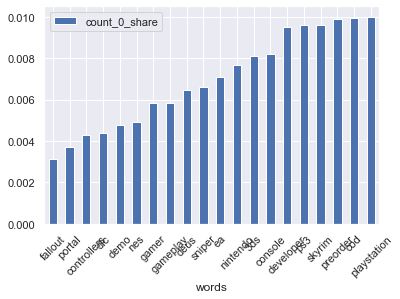

In [192]:
tokens_counted_both.sort_values('count_0_share', ascending=True)[:20].plot.bar('words','count_0_share')
plt.xticks(rotation=45)

## it seems some words related to gaming also appear in tree subreddit comments

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 <a list of 20 Text xticklabel objects>)

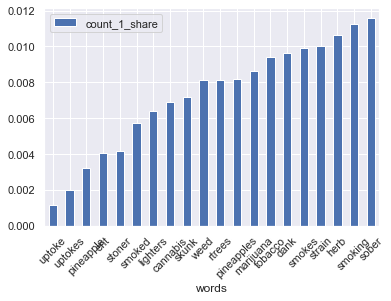

In [218]:
tokens_counted_both.sort_values('count_1_share', ascending=True)[:20].plot.bar('words','count_1_share')
plt.xticks(rotation=45)

## here plot shows gaming share of common words in increasing order
## it seems some words related to tree also appear in gaming subreddit comments
## such as "pineapple","cannabis" and "herb" but they has small share out of all apearance in both subreddits joined together

<BarContainer object of 30 artists>

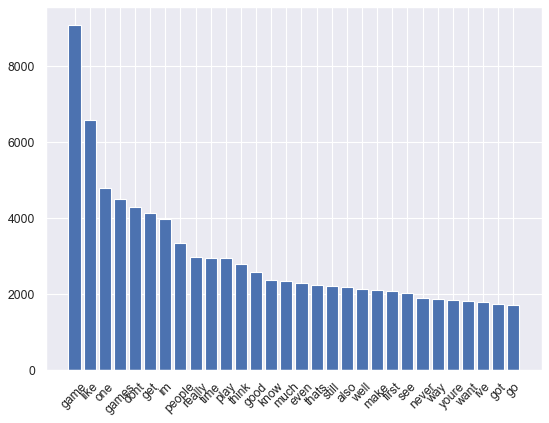

In [179]:
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')

plt.xticks(rotation=45)
plt.bar([a[0] for a in all_tokens_counted_1.most_common()[:30]], [a[1] for a in all_tokens_counted_1.most_common()[:30]])

## here plot shows mostly appeared words in gaming subreddit
## mostly appeared words somehow relate to gaming

<BarContainer object of 30 artists>

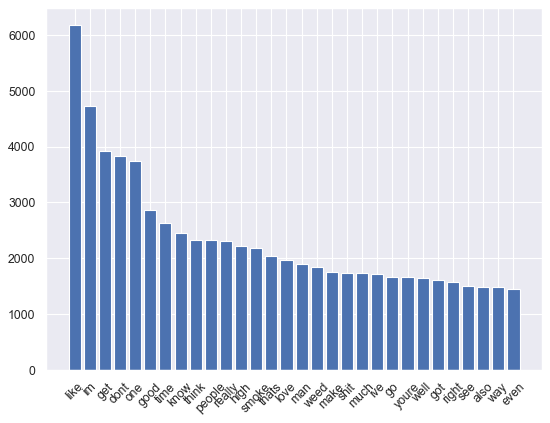

In [34]:
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')

plt.xticks(rotation=45)
plt.bar([a[0] for a in all_tokens_counted_0.most_common()[:30]], [a[1] for a in all_tokens_counted_0.most_common()[:30]])

## here plot shows mostly appeared words in tree subreddit
## it seems mostly appeared words are not related to gardening in general